In [1]:
import numpy as np
import pandas as pd
import pyflux as pf
import datetime as datetime
import matplotlib.pyplot as plt

import os
import pickle


In [2]:
X = pickle.load(open("../data/interest_rate_data", "rb" ))
X_fwds = pickle.load(open('../data/forward_rates', 'rb'))
X_zeros = pickle.load(open('../data/zero_rates', 'rb'))


In [3]:
fed_metrics = pickle.load( open( "../data/mvp_cosine_sim", "rb" ) )
cos_last = fed_metrics['cos_last']
cos_avg_n = fed_metrics['cos_avg_n']
ed_last = fed_metrics['ed_last']
ed_avg_n = fed_metrics['ed_avg_n']
fed_dates = fed_metrics['dates']

# ISSUE: Multiple dates in fed_dates (one date occurs multiple times)

In [ ]:
# X['cos_last'] = 0
# X_fwds['cos_last']=0
# X_zeros['cos_last']=0
# X['cos_avg'] = 0
# X_fwds['cos_avg']=0
# X_zeros['cos_avg']=0

# X['ed_last'] = 0
# X_fwds['ed_last']=0
# X_zeros['ed_last']=0
# X['ed_avg'] = 0
# X_fwds['ed_avg']=0
# X_zeros['ed_avg']=0


In [ ]:
#

In [ ]:
#ed_last[i]


In [ ]:
#print(type(fed_dates))

In [ ]:
# XX = X.copy()

In [ ]:
# # first find unique dates for the fed dates
# date_list = []
# for i in range(len(fed_dates)):
#     this_date = fed_dates[i]
#     if this_date not in date_list:
#         date_list.append(this_date)


In [ ]:
# now creating the loop to assign variables to the X, X_zeros and X_fwds

In [ ]:
# date_list

In [ ]:
# # find index to all dates in fed dates with this date
# ind_dates = fed_dates==date_list[i]

In [ ]:
# # find ed for this index
# this_ed = np.mean(ed_last[ind_dates])

In [ ]:
# this_ed

In [ ]:
# i = 457
# date_list[i]

In [ ]:
# ind_dates = fed_dates==date_list[i]
# sum(ind_dates)

In [ ]:
# for i in range(len(date_list)):
#     this_sum = sum(fed_dates==date_list[i])
#     if this_sum > 1:
#         break

In [7]:
avgstats = pd.DataFrame( {'date':fed_dates, 
               'ed_last':ed_last,
               'ed_avg_n':ed_avg_n,
               'cos_last':cos_last,
               'cos_avg_n':cos_avg_n} ).groupby("date").mean()

In [49]:
np.min(avgstats.index)


Timestamp('2006-03-20 00:00:00')

In [8]:
avgstats.index = pd.to_datetime( avgstats.index )

In [9]:
X = X.merge(avgstats, how='left', left_index=True, right_index=True)

In [10]:
# fed_dates==date_list[i]
# this_sum
X.describe()

,three_m,six_m,one_y,two_y,three_y,five_y,seven_y,ten_y,ed_last,ed_avg_n,cos_last,cos_avg_n
count,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,494.000000,494.000000,494.000000,494.000000
mean,0.011427,0.012523,0.013427,0.015406,0.017595,0.022151,0.025897,0.029388,1.229707,1.229682,0.236689,0.236611
std,0.016504,0.016720,0.016194,0.014783,0.013717,0.011938,0.010655,0.009759,0.052907,0.051209,0.062030,0.060035
min,0.000000,0.000200,0.000800,0.001600,0.002800,0.005600,0.009100,0.013700,1.079679,1.079679,0.091596,0.091596
25%,0.000600,0.001200,0.001900,0.004700,0.008300,0.014000,0.018800,0.021900,1.197524,1.198772,0.194643,0.196159
50%,0.001800,0.003100,0.004900,0.008700,0.012700,0.018400,0.022800,0.027100,1.233755,1.232932,0.235324,0.235316
75%,0.017800,0.019500,0.021200,0.023400,0.024500,0.027300,0.030900,0.035900,1.266405,1.265736,0.275461,0.273112
max,0.051900,0.053300,0.053000,0.052900,0.052600,0.052300,0.052300,0.052600,1.347747,1.347747,0.405139,0.405139


In [16]:
X.fillna(value=0, inplace=True)
X.describe()

,three_m,six_m,one_y,two_y,three_y,five_y,seven_y,ten_y,ed_last,ed_avg_n,cos_last,cos_avg_n
count,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000
mean,0.011427,0.012523,0.013427,0.015406,0.017595,0.022151,0.025897,0.029388,0.183361,0.183357,0.035293,0.035281
std,0.016504,0.016720,0.016194,0.014783,0.013717,0.011938,0.010655,0.009759,0.438559,0.438520,0.087651,0.087417
min,0.000000,0.000200,0.000800,0.001600,0.002800,0.005600,0.009100,0.013700,0.000000,0.000000,0.000000,0.000000
25%,0.000600,0.001200,0.001900,0.004700,0.008300,0.014000,0.018800,0.021900,0.000000,0.000000,0.000000,0.000000
50%,0.001800,0.003100,0.004900,0.008700,0.012700,0.018400,0.022800,0.027100,0.000000,0.000000,0.000000,0.000000
75%,0.017800,0.019500,0.021200,0.023400,0.024500,0.027300,0.030900,0.035900,0.000000,0.000000,0.000000,0.000000
max,0.051900,0.053300,0.053000,0.052900,0.052600,0.052300,0.052300,0.052600,1.347747,1.347747,0.405139,0.405139


In [17]:
X_fwds = X_fwds.merge(avgstats, how='left', left_index = True, right_index = True)
X_zeros = X_zeros.merge(avgstats, how = 'left', left_index = True, right_index = True)


In [18]:
X_fwds.fillna(value=0, inplace=True)
X_zeros.fillna(value=0, inplace=True)


In [19]:
total_obs = len(X)
train_int = int(round(total_obs*.7, 0))
cv_int = int(round(total_obs*.85, 0))

fwd_train = X_fwds[0:train_int]
fwd_cv = X_fwds[train_int:cv_int]
fwd_test = X_fwds[cv_int:]

zero_train = X_zeros[0:train_int]
zero_cv = X_zeros[train_int:cv_int]
zero_test = X_zeros[cv_int:]

X_train = X[0:train_int]
X_cv = X[train_int:cv_int]
X_test = X[cv_int:]


In [20]:
model = pf.ARIMAX(data = fwd_train,
         formula = 'ten_y~1+ed_last',
         ar=1,
         ma=1,
         integ=1,
         family=pf.Normal())

In [21]:

m = model.fit('MLE')
m.summary()


Normal ARIMAX(1,1,1)                                                                                      
======================================================= ==================================================
Dependent Variable: Differenced ten_y                   Method: MLE                                       
Start Date: 2006-01-04 00:00:00                         Log Likelihood: 13323.8714                        
End Date: 2015-04-07 00:00:00                           AIC: -26637.7428                                  
Number of observations: 2317                            BIC: -26609.0027                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    -0.0078    0.6975     -0.0111  0.9911   (-1.3749 | 1.3594)       
MA(1)                                

In [ ]:
# trying different model

In [35]:
model = pf.ARIMAX(data = fwd_train,
         formula = 'ten_y~1+ed_avg_n',
         ar=3,
         ma=3,
         integ=1,
         family=pf.Normal())

In [36]:
m = model.fit('MLE')
m.summary()

Normal ARIMAX(3,1,3)                                                                                      
======================================================= ==================================================
Dependent Variable: Differenced ten_y                   Method: MLE                                       
Start Date: 2006-01-06 00:00:00                         Log Likelihood: 13312.232                         
End Date: 2015-04-07 00:00:00                           AIC: -26606.4639                                  
Number of observations: 2315                            BIC: -26554.7395                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    -0.0077    0.3165     -0.0242  0.9807   (-0.628 | 0.6126)        
AR(2)                                

In [37]:
test_10_y = fwd_train['ten_y']

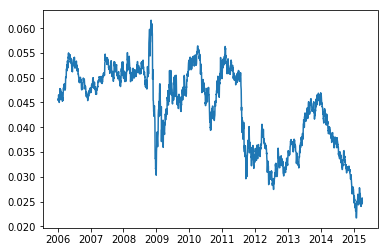

In [38]:
plt.plot(test_10_y)

In [40]:
d1_10_y = test_10_y.diff()

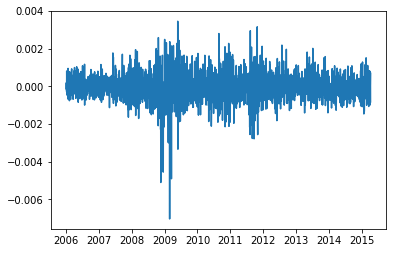

In [42]:
plt.plot(d1_10_y)

In [43]:
np.mean(d1_10_y)

-8.935248362994596e-06

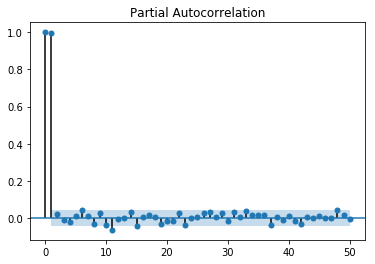

In [45]:

from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
#series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
plot_pacf(test_10_y, lags=50)
pyplot.show()


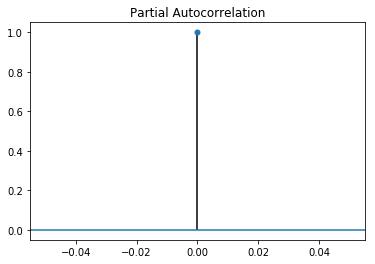

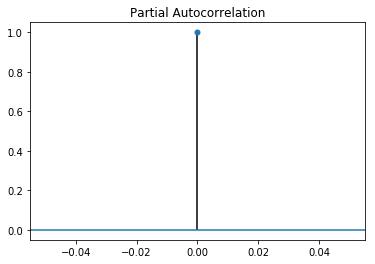

In [47]:
plot_pacf(d1_10_y, lags = 50)